## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression, fetch_california_housing

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 1. Simple Linear Regression (Single Feature)

Let's start with a simple example using one feature to understand the basics.

In [2]:
print("=" * 70)
print("SIMPLE LINEAR REGRESSION (1 FEATURE)")
print("=" * 70)

# Generate simple dataset with one feature
np.random.seed(42)
X_simple = 2 * np.random.rand(100, 1)
y_simple = 4 + 3 * X_simple + np.random.randn(100, 1)

# Flatten y for sklearn
y_simple = y_simple.ravel()

print(f"Dataset shape: {X_simple.shape}")
print(f"Target shape: {y_simple.shape}")
print(f"\nTrue equation: y = 4 + 3x + noise")

SIMPLE LINEAR REGRESSION (1 FEATURE)
Dataset shape: (100, 1)
Target shape: (100,)

True equation: y = 4 + 3x + noise


### Visualize the Simple Dataset

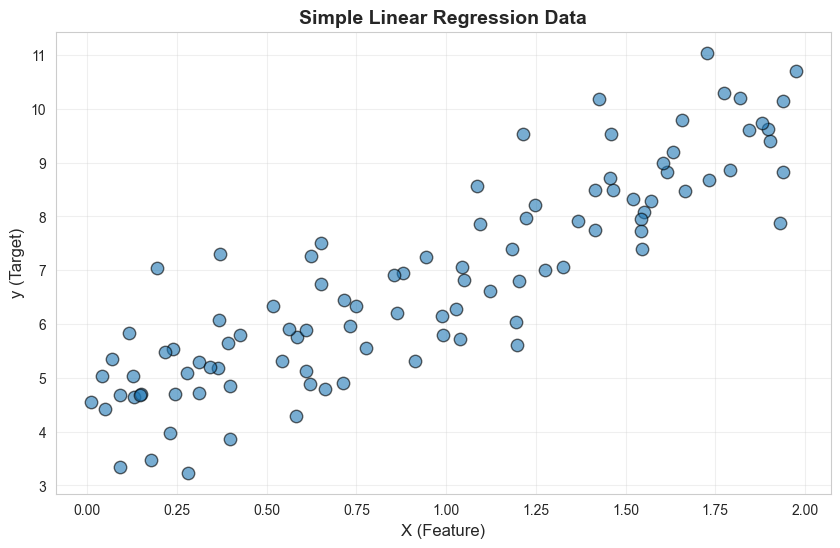

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.6, s=80, edgecolors='k')
plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('y (Target)', fontsize=12)
plt.title('Simple Linear Regression Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

### Train Simple Linear Regression Model

In [4]:
# Create and train the model
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

# Get parameters
intercept = model_simple.intercept_
coefficient = model_simple.coef_[0]

print("Model Parameters:")
print(f"  Intercept (θ₀): {intercept:.4f}")
print(f"  Coefficient (θ₁): {coefficient:.4f}")
print(f"\nLearned equation: y = {intercept:.4f} + {coefficient:.4f}x")
print(f"True equation:    y = 4.0000 + 3.0000x")

# Make predictions
y_simple_pred = model_simple.predict(X_simple)

# Calculate metrics
r2 = r2_score(y_simple, y_simple_pred)
mse = mean_squared_error(y_simple, y_simple_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_simple, y_simple_pred)

print(f"\nModel Performance:")
print(f"  R² Score: {r2:.4f}")
print(f"  MSE: {mse:.4f}")
print(f"  RMSE: {rmse:.4f}")
print(f"  MAE: {mae:.4f}")

Model Parameters:
  Intercept (θ₀): 4.2151
  Coefficient (θ₁): 2.7701

Learned equation: y = 4.2151 + 2.7701x
True equation:    y = 4.0000 + 3.0000x

Model Performance:
  R² Score: 0.7693
  MSE: 0.8066
  RMSE: 0.8981
  MAE: 0.7010


### Visualize the Regression Line

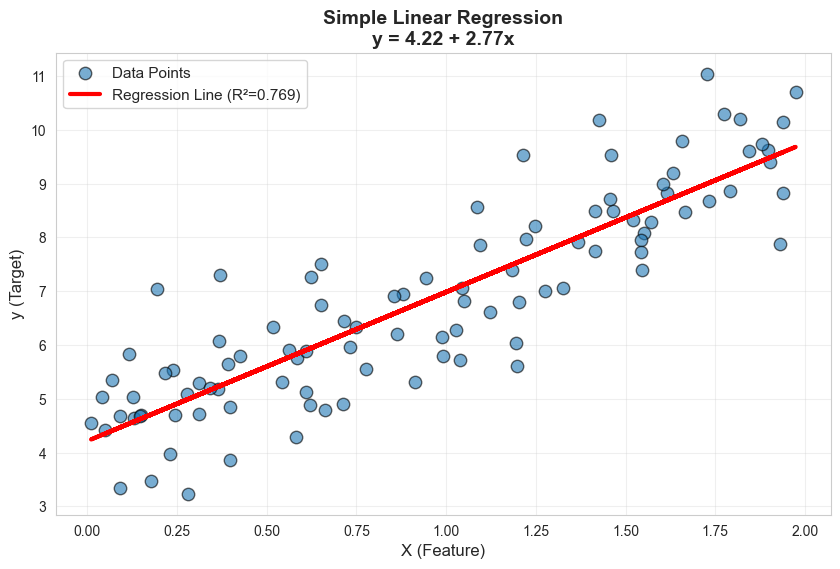

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.6, s=80, edgecolors='k', label='Data Points')
plt.plot(X_simple, y_simple_pred, color='red', linewidth=3, label=f'Regression Line (R²={r2:.3f})')
plt.xlabel('X (Feature)', fontsize=12)
plt.ylabel('y (Target)', fontsize=12)
plt.title(f'Simple Linear Regression\ny = {intercept:.2f} + {coefficient:.2f}x', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

## 2. Multiple Linear Regression (Multiple Features)

Now let's work with multiple features to see how linear regression handles higher dimensions.

In [6]:
print("\n" + "=" * 70)
print("MULTIPLE LINEAR REGRESSION (SYNTHETIC DATA)")
print("=" * 70)

# Generate synthetic dataset with multiple features
X_multi, y_multi = make_regression(
    n_samples=500,
    n_features=5,
    n_informative=5,
    noise=10,
    random_state=42
)

# Create feature names
feature_names = [f'Feature_{i+1}' for i in range(X_multi.shape[1])]

print(f"Dataset shape: {X_multi.shape}")
print(f"Number of samples: {X_multi.shape[0]}")
print(f"Number of features: {X_multi.shape[1]}")
print(f"Target shape: {y_multi.shape}")


MULTIPLE LINEAR REGRESSION (SYNTHETIC DATA)
Dataset shape: (500, 5)
Number of samples: 500
Number of features: 5
Target shape: (500,)


### Split Data into Training and Test Sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 400 samples
Test set: 100 samples


### Train Multiple Linear Regression Model

In [8]:
# Create and train the model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Make predictions
y_train_pred = model_multi.predict(X_train)
y_test_pred = model_multi.predict(X_test)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Model Parameters:")
print(f"  Intercept: {model_multi.intercept_:.4f}")
print(f"\nCoefficients:")
for name, coef in zip(feature_names, model_multi.coef_):
    print(f"  {name}: {coef:.4f}")

print(f"\nTraining Metrics:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE: {train_mae:.4f}")

print(f"\nTest Metrics:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE: {test_mae:.4f}")

Model Parameters:
  Intercept: 0.0451

Coefficients:
  Feature_1: 28.7600
  Feature_2: 81.7747
  Feature_3: 31.0363
  Feature_4: 68.7120
  Feature_5: 10.9411

Training Metrics:
  R² Score: 0.9934
  MSE: 89.6016
  RMSE: 9.4658
  MAE: 7.6852

Test Metrics:
  R² Score: 0.9911
  MSE: 106.3250
  RMSE: 10.3114
  MAE: 8.4038


### Visualize Multiple Regression Results

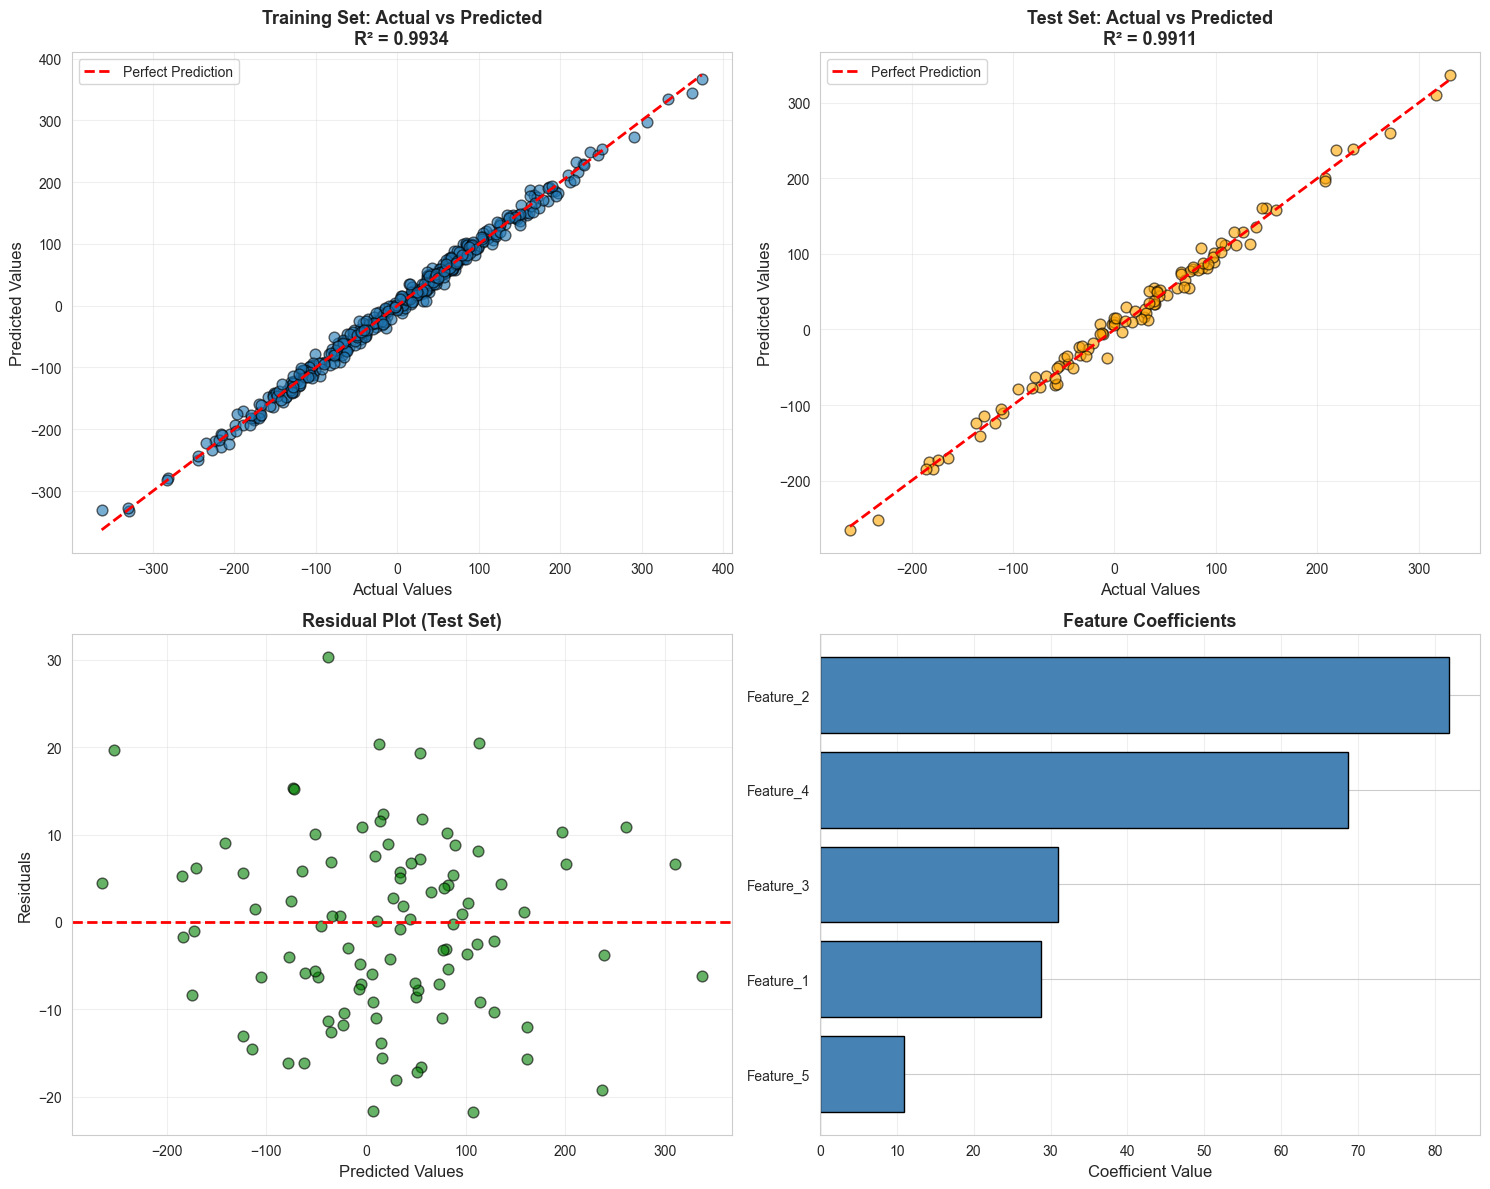

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, edgecolors='k', s=60)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Values', fontsize=12)
axes[0, 0].set_ylabel('Predicted Values', fontsize=12)
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
                     fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, edgecolors='k', s=60, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Values', fontsize=12)
axes[0, 1].set_ylabel('Predicted Values', fontsize=12)
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}', 
                     fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals Plot (Test)
residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.6, edgecolors='k', s=60, color='green')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Values', fontsize=12)
axes[1, 0].set_ylabel('Residuals', fontsize=12)
axes[1, 0].set_title('Residual Plot (Test Set)', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Feature Coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_multi.coef_
}).sort_values('Coefficient')

colors = ['steelblue' if c >= 0 else 'coral' for c in coef_df['Coefficient']]
axes[1, 1].barh(range(len(coef_df)), coef_df['Coefficient'], color=colors, edgecolor='black')
axes[1, 1].set_yticks(range(len(coef_df)))
axes[1, 1].set_yticklabels(coef_df['Feature'])
axes[1, 1].set_xlabel('Coefficient Value', fontsize=12)
axes[1, 1].set_title('Feature Coefficients', fontsize=13, fontweight='bold')
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 3. Cross-Validation

Let's evaluate the model using k-fold cross-validation for more robust performance estimation.

CROSS-VALIDATION ANALYSIS

5-Fold Cross-Validation R² Scores:
  Fold 1: 0.9933
  Fold 2: 0.9915
  Fold 3: 0.9944
  Fold 4: 0.9945
  Fold 5: 0.9868

Cross-Validation Statistics:
  Mean R²: 0.9921
  Std Dev: 0.0029
  Min R²: 0.9868
  Max R²: 0.9945


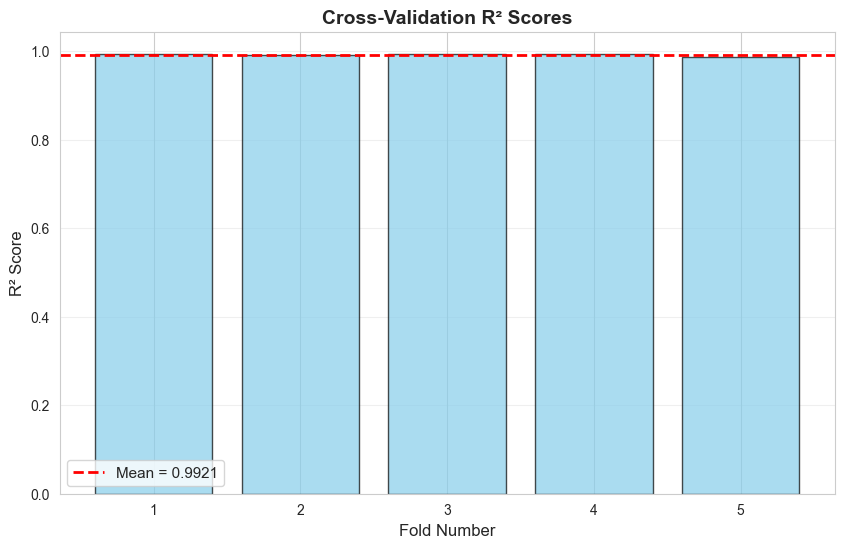

In [10]:
print("=" * 70)
print("CROSS-VALIDATION ANALYSIS")
print("=" * 70)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_multi, X_multi, y_multi, cv=5, 
                            scoring='r2')

print(f"\n5-Fold Cross-Validation R² Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nCross-Validation Statistics:")
print(f"  Mean R²: {cv_scores.mean():.4f}")
print(f"  Std Dev: {cv_scores.std():.4f}")
print(f"  Min R²: {cv_scores.min():.4f}")
print(f"  Max R²: {cv_scores.max():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_scores, color='skyblue', edgecolor='black', alpha=0.7)
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean = {cv_scores.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Cross-Validation R² Scores', fontsize=14, fontweight='bold')
plt.xticks(range(1, 6))
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

## 4. Real-World Example: California Housing Dataset

Let's apply linear regression to a real-world dataset!

In [11]:
print("\n" + "=" * 70)
print("CALIFORNIA HOUSING DATASET")
print("=" * 70)

# Load California housing dataset
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target
feature_names_housing = housing.feature_names

print(f"\nDataset Information:")
print(f"  Number of samples: {X_housing.shape[0]}")
print(f"  Number of features: {X_housing.shape[1]}")
print(f"\nFeatures: {', '.join(feature_names_housing)}")
print(f"\nTarget: Median house value (in $100,000s)")

# Create DataFrame for easier exploration
df_housing = pd.DataFrame(X_housing, columns=feature_names_housing)
df_housing['Price'] = y_housing

print(f"\nFirst 5 rows:")
print(df_housing.head())

print(f"\nDataset Statistics:")
print(df_housing.describe())


CALIFORNIA HOUSING DATASET

Dataset Information:
  Number of samples: 20640
  Number of features: 8

Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

Target: Median house value (in $100,000s)

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.00000

### Split and Scale the Housing Data

In [12]:
# Split the data
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_housing, y_housing,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train_h.shape[0]} samples")
print(f"Test set: {X_test_h.shape[0]} samples")

Training set: 16512 samples
Test set: 4128 samples


### Train Model on Housing Data

In [13]:
# Train the model
model_housing = LinearRegression()
model_housing.fit(X_train_h, y_train_h)

# Make predictions
y_train_pred_h = model_housing.predict(X_train_h)
y_test_pred_h = model_housing.predict(X_test_h)

# Calculate metrics
train_r2_h = r2_score(y_train_h, y_train_pred_h)
test_r2_h = r2_score(y_test_h, y_test_pred_h)
train_rmse_h = np.sqrt(mean_squared_error(y_train_h, y_train_pred_h))
test_rmse_h = np.sqrt(mean_squared_error(y_test_h, y_test_pred_h))
test_mae_h = mean_absolute_error(y_test_h, y_test_pred_h)

print("\nModel Coefficients:")
coef_housing = pd.DataFrame({
    'Feature': feature_names_housing,
    'Coefficient': model_housing.coef_
}).sort_values('Coefficient', ascending=False)
print(coef_housing.to_string(index=False))
print(f"\nIntercept: {model_housing.intercept_:.4f}")

print(f"\nTraining Performance:")
print(f"  R² Score: {train_r2_h:.4f}")
print(f"  RMSE: ${train_rmse_h * 100000:.2f}")

print(f"\nTest Performance:")
print(f"  R² Score: {test_r2_h:.4f}")
print(f"  RMSE: ${test_rmse_h * 100000:.2f}")
print(f"  MAE: ${test_mae_h * 100000:.2f}")


Model Coefficients:
   Feature  Coefficient
 AveBedrms     0.783145
    MedInc     0.448675
  HouseAge     0.009724
Population    -0.000002
  AveOccup    -0.003526
  AveRooms    -0.123323
  Latitude    -0.419792
 Longitude    -0.433708

Intercept: -37.0233

Training Performance:
  R² Score: 0.6126
  RMSE: $71967.57

Test Performance:
  R² Score: 0.5758
  RMSE: $74558.14
  MAE: $53320.01


### Visualize Housing Model Results

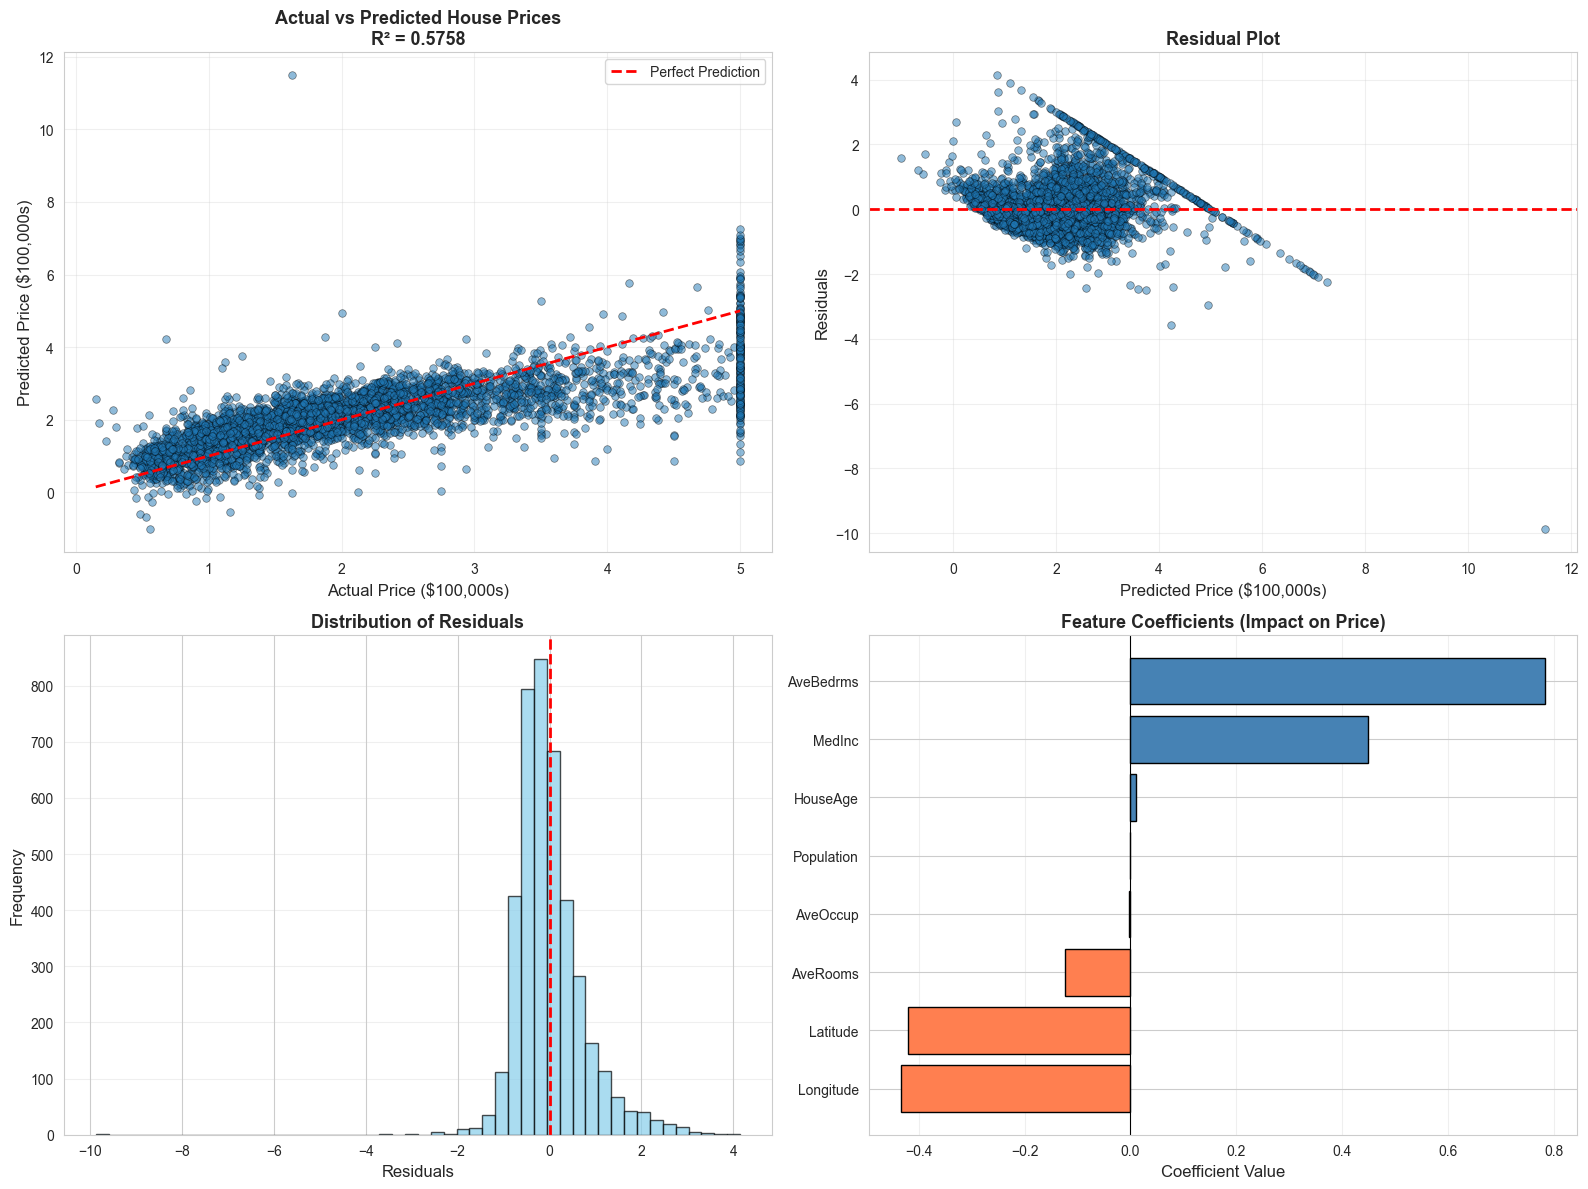

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test_h, y_test_pred_h, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
axes[0, 0].plot([y_test_h.min(), y_test_h.max()], [y_test_h.min(), y_test_h.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($100,000s)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price ($100,000s)', fontsize=12)
axes[0, 0].set_title(f'Actual vs Predicted House Prices\nR² = {test_r2_h:.4f}', 
                     fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals Plot
residuals_h = y_test_h - y_test_pred_h
axes[0, 1].scatter(y_test_pred_h, residuals_h, alpha=0.5, s=30, edgecolors='k', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price ($100,000s)', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals Distribution
axes[1, 0].hist(residuals_h, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Feature Importance (Coefficients)
coef_sorted = coef_housing.sort_values('Coefficient')
colors = ['steelblue' if c >= 0 else 'coral' for c in coef_sorted['Coefficient']]
axes[1, 1].barh(range(len(coef_sorted)), coef_sorted['Coefficient'], 
                color=colors, edgecolor='black')
axes[1, 1].set_yticks(range(len(coef_sorted)))
axes[1, 1].set_yticklabels(coef_sorted['Feature'])
axes[1, 1].set_xlabel('Coefficient Value', fontsize=12)
axes[1, 1].set_title('Feature Coefficients (Impact on Price)', fontsize=13, fontweight='bold')
axes[1, 1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 5. Model Interpretation

Let's interpret what the coefficients tell us about house prices.

In [15]:
print("=" * 70)
print("MODEL INTERPRETATION")
print("=" * 70)

print("\nCoefficient Interpretation (Impact on Price):")
print("(All values in units of $100,000)\n")

for feature, coef in zip(feature_names_housing, model_housing.coef_):
    impact = "increases" if coef > 0 else "decreases"
    print(f"  {feature:15} → {impact:9} price by ${abs(coef)*100000:,.2f} per unit increase")

print(f"\nBaseline (Intercept): ${model_housing.intercept_ * 100000:,.2f}")

# Make a sample prediction
print("\n" + "=" * 70)
print("SAMPLE PREDICTION")
print("=" * 70)

sample_house = X_test_h[0:1]
actual_price = y_test_h[0]
predicted_price = model_housing.predict(sample_house)[0]

print("\nSample House Features:")
for feature, value in zip(feature_names_housing, sample_house[0]):
    print(f"  {feature:15} = {value:.4f}")

print(f"\nActual Price:    ${actual_price * 100000:,.2f}")
print(f"Predicted Price: ${predicted_price * 100000:,.2f}")
print(f"Difference:      ${abs(actual_price - predicted_price) * 100000:,.2f}")
print(f"Error:           {abs(actual_price - predicted_price) / actual_price * 100:.2f}%")

MODEL INTERPRETATION

Coefficient Interpretation (Impact on Price):
(All values in units of $100,000)

  MedInc          → increases price by $44,867.49 per unit increase
  HouseAge        → increases price by $972.43 per unit increase
  AveRooms        → decreases price by $12,332.33 per unit increase
  AveBedrms       → increases price by $78,314.49 per unit increase
  Population      → decreases price by $0.20 per unit increase
  AveOccup        → decreases price by $352.63 per unit increase
  Latitude        → decreases price by $41,979.25 per unit increase
  Longitude       → decreases price by $43,370.81 per unit increase

Baseline (Intercept): $-3,702,327.77

SAMPLE PREDICTION

Sample House Features:
  MedInc          = 1.6812
  HouseAge        = 25.0000
  AveRooms        = 4.1922
  AveBedrms       = 1.0223
  Population      = 1392.0000
  AveOccup        = 3.8774
  Latitude        = 36.0600
  Longitude       = -119.0100

Actual Price:    $47,700.00
Predicted Price: $71,912.28
Di

## 6. Key Insights About Linear Regression

In [16]:
print("\n" + "=" * 70)
print("KEY INSIGHTS ABOUT LINEAR REGRESSION")
print("=" * 70)

print("""
📌 What is Linear Regression?
   - Models the relationship between features (X) and target (y) using a linear equation
   - Hypothesis: y = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ
   - Minimizes Mean Squared Error (MSE) to find optimal parameters

📌 Key Characteristics:
   ✓ Simple and interpretable
   ✓ Fast to train and predict
   ✓ Works well when relationship is approximately linear
   ✓ Provides insight into feature importance through coefficients

📌 Model Parameters:
   - Intercept (θ₀): Baseline value when all features are 0
   - Coefficients (θ₁, θ₂, ...): Impact of each feature on the target
   - Positive coefficient → feature increases target
   - Negative coefficient → feature decreases target

📌 Evaluation Metrics:
   - R² Score: Proportion of variance explained (0 to 1, higher is better)
   - MSE: Mean Squared Error (lower is better)
   - RMSE: Root Mean Squared Error (in same units as target)
   - MAE: Mean Absolute Error (robust to outliers)

📌 Assumptions:
   1. Linearity: Relationship between X and y is linear
   2. Independence: Observations are independent
   3. Homoscedasticity: Constant variance of residuals
   4. Normality: Residuals are normally distributed
   5. No multicollinearity: Features are not highly correlated

📌 When to Use Linear Regression:
   ✓ Predicting continuous values
   ✓ Understanding feature relationships
   ✓ Baseline model for comparison
   ✓ When interpretability is important

📌 Limitations:
   ⚠ Assumes linear relationship (may underfit complex patterns)
   ⚠ Sensitive to outliers
   ⚠ Doesn't handle categorical features natively
   ⚠ May overfit with too many features (use regularization)

📌 Improvements:
   - Polynomial Features: Capture non-linear relationships
   - Ridge Regression: Add L2 regularization
   - Lasso Regression: Add L1 regularization + feature selection
   - Elastic Net: Combine Ridge and Lasso
""")

print("=" * 70)
print("NOTEBOOK COMPLETED SUCCESSFULLY!")
print("=" * 70)


KEY INSIGHTS ABOUT LINEAR REGRESSION

📌 What is Linear Regression?
   - Models the relationship between features (X) and target (y) using a linear equation
   - Hypothesis: y = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ
   - Minimizes Mean Squared Error (MSE) to find optimal parameters

📌 Key Characteristics:
   ✓ Simple and interpretable
   ✓ Fast to train and predict
   ✓ Works well when relationship is approximately linear
   ✓ Provides insight into feature importance through coefficients

📌 Model Parameters:
   - Intercept (θ₀): Baseline value when all features are 0
   - Coefficients (θ₁, θ₂, ...): Impact of each feature on the target
   - Positive coefficient → feature increases target
   - Negative coefficient → feature decreases target

📌 Evaluation Metrics:
   - R² Score: Proportion of variance explained (0 to 1, higher is better)
   - MSE: Mean Squared Error (lower is better)
   - RMSE: Root Mean Squared Error (in same units as target)
   - MAE: Mean Absolute Error (robust to outliers)

